In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
import sklearn.linear_model
import os

import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd

os.sys.path.append("C:\\Users\\mplitt\\MightyMorphingPhotonRangers\\CensoredLstsq")
os.sys.path.append("")

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [4]:
mouse = '4139219.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

sess = df_mouse.iloc[10]
print(sess['data file'])

G:\My Drive\\VR_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout_2.sqlite


In [5]:
VRDat,C, S, A = pp.load_scan_sess(sess,fneu_coeff=0)
#C = sp.stats.zscore(C,axis=0)
cmax = np.mean(C,axis=0)
print(cmax.shape)
C= np.divide(C,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(1795,)


In [6]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
#S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)
#C_trial_mat = np.nanmean(C_trial_mat,axis=1)

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:256: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:257: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [30]:
np.isnan(C_trial_mat).sum()

254890

In [31]:
print(C_trial_mat.shape)

(120, 45, 1795)


In [7]:

C_trial_Ncat = np.reshape(C_trial_mat[:,:20,:],[C_trial_mat.shape[0],-1])

In [33]:
np.isnan(C_trial_Ncat).sum()

0

In [34]:
print(C_trial_Ncat.shape)

(120, 35900)


In [8]:
from cv import masked_pca

In [36]:
U,Vt,train_err = masked_pca(np.copy(C_trial_Ncat),6,nonneg=True)

0 0.21225342
1 0.19613002
2 0.19154489
3 0.18977869
4 0.18886593
5 0.18837762
6 0.18809213
7 0.1879033
8 0.187766
9 0.18766081
10 0.18757921
11 0.18751435
12 0.18746182
13 0.18741862
14 0.18738353
15 0.18735509
16 0.18733229
17 0.18731382
18 0.18729885
19 0.18728651
20 0.18727645
21 0.18726814
22 0.18726125
23 0.18725546
24 0.18725057
25 0.18724641
26 0.18724295
27 0.18723986
28 0.18723723
29 0.18723498
30 0.18723297
31 0.18723124
32 0.1872297
33 0.18722819
34 0.18722697
35 0.18722583
36 0.18722476
37 0.18722382
38 0.18722296
39 0.18722218
40 0.18722142
41 0.18722077
42 0.18722007
43 0.1872195
44 0.18721901
45 0.18721843
46 0.18721794
47 0.18721756
48 0.18721719
49 0.18721676


0.34105797153671197 4.740484256334346
0.38120914360123775 6.0322299784728095


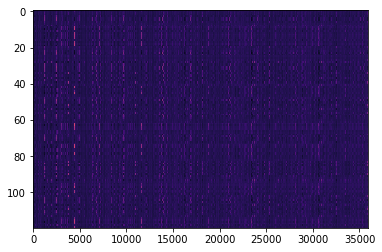

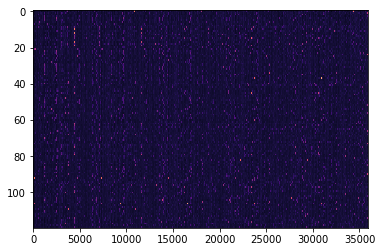

In [37]:
f,ax = plt.subplots()
ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')
print(C_trial_Ncat.ravel().min(),C_trial_Ncat.ravel().max())

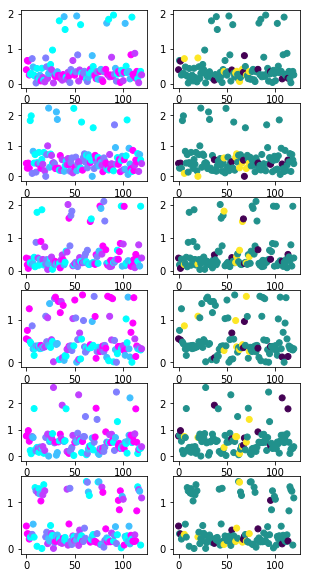

In [38]:
f,ax = plt.subplots(U.shape[1],2,figsize=[5,10])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    #ax[factor].set_ylim([0,2])

(120, 45, 1795)
(120,)
[ 9193.23566    44606.05875897 18039.57836726 44048.87093308
 43826.97880568 43265.94286589 44123.3377613  44941.20378184
 45344.45267475 46177.372965   45901.84632681 44986.39312212
 44391.27057497 44810.52129106 45164.09222251 45766.57945083
 44630.17467682 44849.6615786  44368.03868464 45583.68357565
 45393.56832184 44483.44824471 45187.73435687 44348.44610588
 44801.33442592 45024.62284334 44752.36523397 45197.96872689
 45304.22763887 45039.21902307 44858.01489423 44292.58256567
 43878.47884964 45251.42182836 44292.71354447 44870.284745
 44919.26599366 20490.21830249 45683.91090663 45596.6470509
 45019.43901408 45554.91572793 46447.60005898 45695.44980662
 45288.18596197 45526.51144589 45353.53359385 46211.89882765
 45965.13326633 44266.62043369 45308.13692725 45334.05929457
 45187.4893276  44759.4739777  45557.12278619 10701.3217763
 44594.27161888 44103.07433557 45316.05635284 45426.34950026
 45770.33205482 45249.24181777 46673.01948506 46124.63517722
 4669

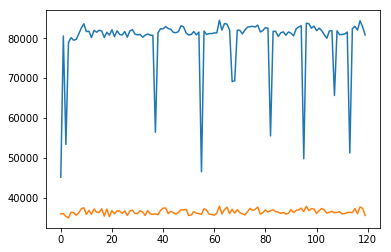

In [39]:
print(C_trial_mat.shape)
trialAct=np.nansum(np.nansum(C_trial_mat,axis=-1),axis=-1)
print(trialAct.shape)
f,ax = plt.subplots()
ax.plot(trialAct)
ax.plot(np.nansum(C_trial_Ncat,axis=-1))
print(trialAct-np.nansum(C_trial_Ncat,axis=-1))

In [9]:
os.sys.path.append("C:\\Users\\mplitt\\nmftools-master\\nmftools")
import ensemble as nmf


In [41]:
print(ranks)

NameError: name 'ranks' is not defined

In [1]:
data = np.copy(C_trial_Ncat)
u,vt,train_err = masked_pca(data,50,nonneg=False)


NameError: name 'np' is not defined

In [ ]:
reslist = []
for r in range(50):
    print(r)
    resid = np.memmap(os.path.join("E:\\","resid.dat"),dtype='float32',mode='r+',shape=tuple(data.shape))
    resid = np.dot(u[:, :r], vt[:r,:])-data
    resid = np.sqrt(np.nanmean(resid**2))
    reslist.append(resid)
#     results[r]['svd_rmse'] = resid

In [ ]:
f,ax = plt.subplots()
ax.plot(reslist)

In [10]:
results = nmf.fit_ensemble_masked(np.copy(C_trial_Ncat),np.arange(1,10),n_replicates=5)

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
0 0.22627828
1 0.22593439
2 0.22593436
3 0.22593436
4 0.22593436
5 0.22593436
6 0.22593436
7 0.22593436
8 0.22593436
9 0.22593436
10 0.22593436
11 0.22593436
12 0.22593436
13 0.22593436
14 0.22593436
15 0.22593436
16 0.22593436
17 0.22593436
18 0.22593436
19 0.22593436
20 0.22593436
21 0.22593436
22 0.22593436
23 0.22593436
24 0.22593436
25 0.22593436
26 0.22593436
27 0.22593436
28 0.22593436
29 0.22593436
30 0.22593436
31 0.22593436
32 0.22593436
33 0.22593436
34 0.22593436
35 0.22593436
36 0.22593436
37 0.22593436
38 0.22593436
39 0.22593436
40 0.22593436
41 0.22593436
42 0.22593436
43 0.22593436
44 0.22593436
45 0.22593436
46 0.22593436
47 0.22593436
48 0.22593436
49 0.22593436
replicate 1
0 0.22619009
1 0.22593431
2 0.22593434
3 0.22593436
4 0.22593436
5 0.22593436
6 0.22593436
7 0.22593436
8 0.22593436
9 0.22593436
10 0.22593436
11 0.22593436
12 0.22593436
13 0.22593436
14 0.22593436
15 0.22593436
16 0.22593436
17 0.22593436
18 0.22593436
19 0.22593436
20 0.22593436
21

 11%|█████████                                                                        | 1/9 [12:08<1:37:10, 728.80s/it]

replicate 0
0 0.2241534
1 0.22046821
2 0.21908548
3 0.21797028
4 0.21693994
5 0.21617056
6 0.21572338
7 0.21549971
8 0.21539593
9 0.21534973
10 0.21532948
11 0.21532063
12 0.21531676
13 0.21531497
14 0.21531413
15 0.21531373
16 0.21531354
17 0.21531351
18 0.21531342
19 0.21531337
20 0.21531337
21 0.21531339
22 0.21531339
23 0.21531336
24 0.21531339
25 0.21531332
26 0.21531337
27 0.21531333
28 0.21531336
29 0.21531324
30 0.2153133
31 0.21531326
32 0.21531327
33 0.2153133
34 0.21531329
35 0.21531324
36 0.21531326
37 0.21531327
38 0.21531327
39 0.21531326
40 0.21531329
41 0.21531324
42 0.21531327
43 0.21531333
44 0.21531335
45 0.21531327
46 0.21531324
47 0.21531327
48 0.21531327
49 0.21531324
replicate 1
0 0.2234849
1 0.21976188
2 0.21767032
3 0.21634652
4 0.21579166
5 0.21556294
6 0.21545094
7 0.21539111
8 0.21535781
9 0.21533883
10 0.215328
11 0.21532175
12 0.21531816
13 0.21531604
14 0.21531485
15 0.2153141
16 0.2153137
17 0.21531354
18 0.2153134
19 0.21531337
20 0.21531336
21 0.215313

 22%|██████████████████                                                               | 2/9 [29:03<1:35:01, 814.46s/it]

replicate 0
0 0.22185378
1 0.21304514
2 0.21035686
3 0.20924786
4 0.20847903
5 0.20797876
6 0.20764743
7 0.20743136
8 0.20729119
9 0.20719962
10 0.20713794
11 0.2070946
12 0.20706259
13 0.20703782
14 0.20701782
15 0.2070012
16 0.20698713
17 0.20697543
18 0.20696582
19 0.20695752
20 0.20695041
21 0.20694421
22 0.20693874
23 0.20693381
24 0.20692946
25 0.2069257
26 0.2069223
27 0.20691928
28 0.20691662
29 0.20691417
30 0.20691207
31 0.20691009
32 0.20690835
33 0.20690681
34 0.20690534
35 0.206904
36 0.20690289
37 0.20690177
38 0.20690084
39 0.20690003
40 0.20689921
41 0.20689847
42 0.2068979
43 0.2068973
44 0.2068967
45 0.20689629
46 0.20689586
47 0.20689547
48 0.20689514
49 0.2068948
replicate 1
0 0.21739262
1 0.20920938
2 0.2077302
3 0.20725001
4 0.20705315
5 0.20696715
6 0.2069285
7 0.20691071
8 0.20690207
9 0.20689769
10 0.2068953
11 0.2068939
12 0.2068931
13 0.20689254
14 0.20689213
15 0.20689191
16 0.20689164
17 0.20689158
18 0.20689143
19 0.20689133
20 0.20689125
21 0.20689115
22 

 33%|███████████████████████████                                                      | 3/9 [47:23<1:30:01, 900.30s/it]

replicate 0
0 0.2179918
1 0.20448191
2 0.20089978
3 0.20006669
4 0.19984972
5 0.19976725
6 0.19972658
7 0.19970173
8 0.19968425
9 0.1996709
10 0.19966029
11 0.19965105
12 0.19964254
13 0.19963415
14 0.19962567
15 0.19961657
16 0.19960661
17 0.19959544
18 0.19958295
19 0.19956909
20 0.1995536
21 0.19953658
22 0.19951808
23 0.19949841
24 0.1994778
25 0.19945666
26 0.1994354
27 0.19941434
28 0.19939378
29 0.19937408
30 0.19935527
31 0.19933778
32 0.19932175
33 0.19930698
34 0.19929379
35 0.1992819
36 0.19927122
37 0.19926178
38 0.19925344
39 0.19924594
40 0.19923936
41 0.1992335
42 0.1992283
43 0.19922374
44 0.19921966
45 0.19921608
46 0.19921285
47 0.19921005
48 0.19920754
49 0.19920534
replicate 1
0 0.21446554
1 0.20376836
2 0.20121592
3 0.2004875
4 0.200134
5 0.1999031
6 0.19973141
7 0.19959883
8 0.19949692
9 0.19941989
10 0.19936246
11 0.19932021
12 0.19928949
13 0.1992671
14 0.19925083
15 0.19923876
16 0.19922975
17 0.19922292
18 0.19921759
19 0.19921346
20 0.19921014
21 0.1992074
22

 44%|███████████████████████████████████                                            | 4/9 [1:07:41<1:22:57, 995.44s/it]

replicate 0
0 0.21541715
1 0.20060492
2 0.19642171
3 0.19500893
4 0.19433014
5 0.19390936
6 0.193631
7 0.19345309
8 0.19334261
9 0.19327316
10 0.19322915
11 0.19320272
12 0.19318685
13 0.19317614
14 0.19316779
15 0.19316074
16 0.19315453
17 0.19314878
18 0.19314335
19 0.19313836
20 0.19313344
21 0.19312868
22 0.19312413
23 0.19311963
24 0.19311525
25 0.1931108
26 0.19310638
27 0.19310202
28 0.19309764
29 0.19309314
30 0.19308871
31 0.19308412
32 0.19307949
33 0.19307476
34 0.19307005
35 0.19306517
36 0.19306019
37 0.19305512
38 0.19305003
39 0.19304475
40 0.19303957
41 0.19303414
42 0.19302884
43 0.19302347
44 0.19301808
45 0.1930127
46 0.19300741
47 0.19300213
48 0.19299693
49 0.1929919
replicate 1
0 0.21406841
1 0.19922629
2 0.19585718
3 0.19483384
4 0.19431156
5 0.19397713
6 0.1937562
7 0.19360363
8 0.19349207
9 0.19340609
10 0.19333637
11 0.19327739
12 0.19322675
13 0.19318272
14 0.19314344
15 0.19310835
16 0.19307724
17 0.19304976
18 0.19302566
19 0.19300464
20 0.1929863
21 0.1929

 56%|███████████████████████████████████████████▎                                  | 5/9 [1:28:28<1:11:24, 1071.09s/it]

replicate 0
0 0.20933177
1 0.19508368
2 0.19124243
3 0.18968458
4 0.18897417
5 0.18856485
6 0.1883103
7 0.18814798
8 0.18804125
9 0.18796831
10 0.18791632
11 0.18787783
12 0.18784897
13 0.18782644
14 0.18780704
15 0.18778889
16 0.18777107
17 0.18775317
18 0.18773513
19 0.18771665
20 0.18769781
21 0.18767865
22 0.18765911
23 0.18763942
24 0.18761966
25 0.18759984
26 0.18758032
27 0.187561
28 0.18754199
29 0.18752353
30 0.18750538
31 0.18748781
32 0.18747078
33 0.18745443
34 0.18743853
35 0.18742332
36 0.1874087
37 0.1873947
38 0.18738152
39 0.18736894
40 0.1873572
41 0.18734622
42 0.18733579
43 0.1873263
44 0.18731739
45 0.18730919
46 0.18730173
47 0.18729487
48 0.18728858
49 0.18728285
replicate 1
0 0.21051222
1 0.1960526
2 0.19143689
3 0.1897254
4 0.18904273
5 0.18869692
6 0.18846488
7 0.18829268
8 0.18816026
9 0.18805584
10 0.18797247
11 0.18790545
12 0.18785082
13 0.1878059
14 0.1877686
15 0.18773715
16 0.18771066
17 0.18768784
18 0.1876684
19 0.18765174
20 0.18763773
21 0.18762583


 67%|█████████████████████████████████████████████████████▎                          | 6/9 [1:50:28<57:16, 1145.57s/it]

replicate 0
0 0.21139197
1 0.19359685
2 0.18797235
3 0.18588606
4 0.18490735
5 0.18436958
6 0.18401866
7 0.1837649
8 0.18356912
9 0.18341704
10 0.18329558
11 0.18319277
12 0.18310255
13 0.18302125
14 0.18294717
15 0.18287934
16 0.18281764
17 0.18276203
18 0.1827119
19 0.18266723
20 0.18262757
21 0.18259266
22 0.18256214
23 0.18253578
24 0.18251267
25 0.18249254
26 0.18247505
27 0.1824597
28 0.18244621
29 0.18243442
30 0.18242401
31 0.1824148
32 0.18240663
33 0.18239939
34 0.18239297
35 0.18238723
36 0.18238206
37 0.18237744
38 0.18237317
39 0.18236943
40 0.18236598
41 0.18236284
42 0.18235995
43 0.18235739
44 0.18235497
45 0.18235278
46 0.18235072
47 0.18234883
48 0.18234709
49 0.18234546
replicate 1
0 0.20846117
1 0.18820217
2 0.18547367
3 0.18469
4 0.18427691
5 0.18399327
6 0.18376607
7 0.18357363
8 0.18340702
9 0.1832648
10 0.18314688
11 0.18305199
12 0.18297675
13 0.18291728
14 0.18286961
15 0.18283024
16 0.18279666
17 0.18276778
18 0.1827427
19 0.18272057
20 0.18270098
21 0.182683

 78%|██████████████████████████████████████████████████████████████▏                 | 7/9 [2:13:56<40:49, 1224.53s/it]

replicate 0
0 0.20829773
1 0.18599895
2 0.1818238
3 0.1805089
4 0.17980327
5 0.17939311
6 0.17913471
7 0.17895277
8 0.17881691
9 0.17871542
10 0.1786373
11 0.17857383
12 0.1785205
13 0.17847483
14 0.17843513
15 0.1784002
16 0.17836924
17 0.17834152
18 0.1783166
19 0.17829388
20 0.17827323
21 0.1782542
22 0.17823683
23 0.17822091
24 0.17820626
25 0.17819263
26 0.17817992
27 0.17816798
28 0.17815681
29 0.1781463
30 0.17813624
31 0.17812666
32 0.17811747
33 0.17810859
34 0.17809997
35 0.17809178
36 0.17808378
37 0.17807601
38 0.17806843
39 0.17806105
40 0.17805383
41 0.17804676
42 0.17803983
43 0.17803311
44 0.17802651
45 0.17802018
46 0.178014
47 0.17800792
48 0.17800206
49 0.17799643
replicate 1
0 0.2086975
1 0.18933466
2 0.18375462
3 0.18153083
4 0.18059091
5 0.1800952
6 0.17979011
7 0.17958087
8 0.17942622
9 0.17930777
10 0.17921208
11 0.17913194
12 0.17906322
13 0.17900246
14 0.17894784
15 0.1788979
16 0.17885126
17 0.17880702
18 0.17876467
19 0.1787236
20 0.17868432
21 0.17864788
22

 89%|███████████████████████████████████████████████████████████████████████         | 8/9 [2:39:07<21:50, 1310.31s/it]

replicate 0
0 0.20610157
1 0.18589598
2 0.18020834
3 0.17803107
4 0.17690796
5 0.17618477
6 0.17571692
7 0.17542033
8 0.17522267
9 0.17507803
10 0.17496216
11 0.17486276
12 0.17477365
13 0.17469174
14 0.17461582
15 0.17454587
16 0.17448214
17 0.17442472
18 0.17437385
19 0.17432912
20 0.1742901
21 0.1742562
22 0.17422675
23 0.17420112
24 0.17417888
25 0.17415923
26 0.17414194
27 0.17412648
28 0.17411269
29 0.17410028
30 0.17408893
31 0.17407863
32 0.17406912
33 0.17406045
34 0.17405224
35 0.17404456
36 0.1740374
37 0.1740306
38 0.17402431
39 0.1740182
40 0.17401244
41 0.17400701
42 0.17400175
43 0.17399675
44 0.1739919
45 0.17398724
46 0.1739828
47 0.17397852
48 0.17397444
49 0.1739706
replicate 1
0 0.21021526
1 0.18714842
2 0.18031499
3 0.17812625
4 0.17680196
5 0.17600459
6 0.17552109
7 0.17519999
8 0.17496844
9 0.1747996
10 0.17467065
11 0.1745663
12 0.17448004
13 0.1744078
14 0.17434655
15 0.17429422
16 0.17424917
17 0.17421013
18 0.17417614
19 0.17414641
20 0.17412013
21 0.1740969


100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [3:06:56<00:00, 1418.09s/it]


0 0.2183858
1 0.18138953
2 0.17708975
3 0.17585668
4 0.17531538
5 0.1749935
6 0.1747753
7 0.1746219
8 0.17451069
9 0.17442529
10 0.17435491
11 0.17429273
12 0.17423539
13 0.1741815
14 0.17413077
15 0.17408374
16 0.17404103
17 0.1740031
18 0.17397031
19 0.17394243
20 0.17391925
21 0.17390038
22 0.1738851
23 0.17387289
24 0.1738633
25 0.17385575
26 0.17384988
27 0.17384529
28 0.17384176
29 0.17383899
30 0.1738369
31 0.17383528
32 0.17383403
33 0.17383307
34 0.17383237
35 0.17383176
36 0.1738313
37 0.17383099
38 0.17383076
39 0.17383057
40 0.17383045
41 0.17383032
42 0.17383024
43 0.17383017
44 0.17383006
45 0.17383008
46 0.17383002
47 0.17383
48 0.17382999
49 0.17382996


In [11]:
import plots 

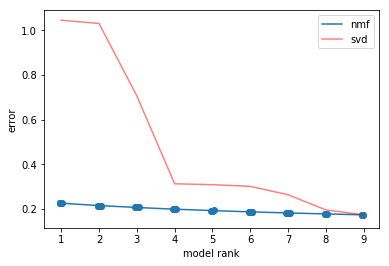

In [12]:
plots.plot_rmse(results)

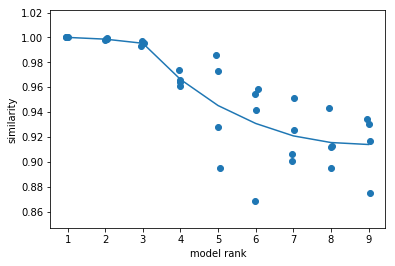

In [13]:
plots.plot_similarity(results)

In [17]:
print(results.keys())
rank = 3

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [18]:
U,Vt = results[rank]['factors'][0][0],results[rank]['factors'][0][1]

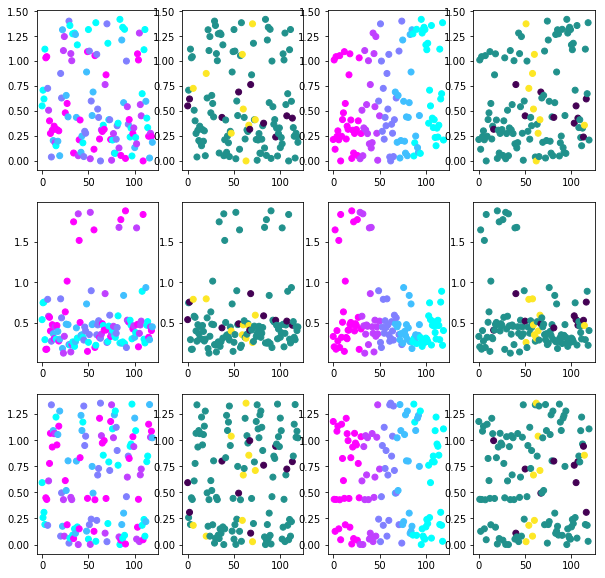

In [19]:
f,ax = plt.subplots(U.shape[1],4,figsize=[10,10])
# ff,aax = plt.subplots(U.shape[1],1,figsize=[5,10])
sort = np.argsort(trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter'])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=1-trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    ax[factor,2].scatter(np.arange(120),U[sort,factor],c=1-trial_info['morphs'][sort],cmap='cool')
    ax[factor,3].scatter(np.arange(120),U[sort,factor],c=trial_info['rewards'][sort]+2*trial_info['omissions'][sort],cmap='viridis')

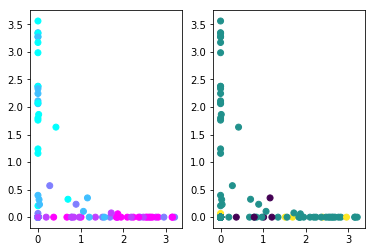

In [61]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[:,0],U[:,1],c=trial_info['morphs'],cmap='cool')
ax[1].scatter(U[:,0],U[:,1],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')

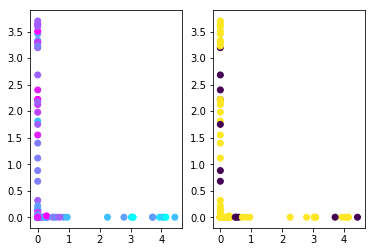

In [48]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[1:,0],U[1:,1],c=trial_info['morphs'][1:]-trial_info['morphs'][0:-1],cmap='cool')
ax[1].scatter(U[1:,0],U[1:,1],c=trial_info['rewards'][0:-1],cmap='viridis')

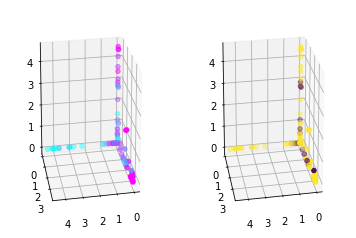

In [49]:
from mpl_toolkits.mplot3d import Axes3D
f= plt.figure()
ax=f.add_subplot(121,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,3],c=trial_info['morphs'],cmap='cool')
ax.view_init(20,80)

ax=f.add_subplot(122,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,3],c=trial_info['rewards'],cmap='viridis')
ax.view_init(20,80)

0.32281564999120377 4.622904249293909
0.38120914360123775 6.0322299784728095


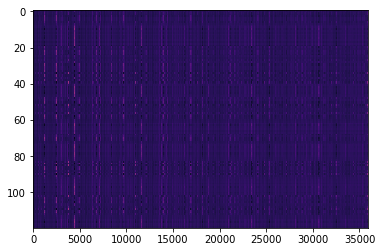

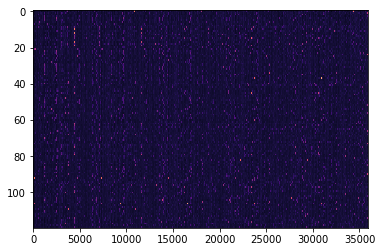

In [20]:
f,ax = plt.subplots()

ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')
print(C_trial_Ncat.ravel().min(),C_trial_Ncat.ravel().max())

In [63]:
np.isnan(C_trial_Ncat).sum()

87984

In [64]:
print(U.shape)

(120, 4)


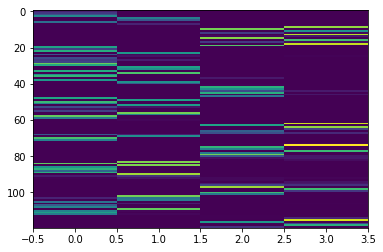

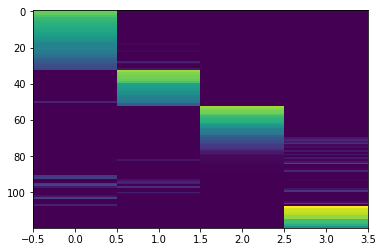

In [65]:
import sklearn.cluster
import sklearn.metrics
import scipy.cluster.hierarchy as sch

D = sk.metrics.pairwise_distances(U)


km = sk.cluster.KMeans(n_clusters=rank).fit(U)

order = []
for col in range(U.shape[1]):

    # arg sort by column value, descending
    colorder = np.flip(np.argsort(U[:,col]),axis=0)
#     print(km.labels_[colorder])
    lbl = km.labels_[colorder[0]]
#     print(lbl)
#     print(U[colorder,col])
#     print(colorder[km.labels_[colorder]==lbl])
#     print(U[colorder[km.labels_[colorder]==lbl],col])
    # find all labels that have the same as first index
    order.extend(colorder[km.labels_[colorder]==lbl])
    

    

# centroids = np.linalg.norm(km.cluster_centers_-km.cluster_centers_[0,:],axis=1)
# # centroids = centroids-centroids[0]
# colOrder=np.argsort(centroids)
# inds = np.argsort(km.labels_)

f,ax = plt.subplots()
ax.imshow(U,aspect='auto')

# order = np.flip(np.argsort(U[:,0]),axis=0)
Uk=U[order,:]
# Ukc = Uk[:,colOrder]
f,ax = plt.subplots()
ax.imshow(Uk,aspect='auto')

In [66]:
Vmat = np.reshape(Vt,[rank,C_trial_mat.shape[1],C_trial_mat.shape[2]])

C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


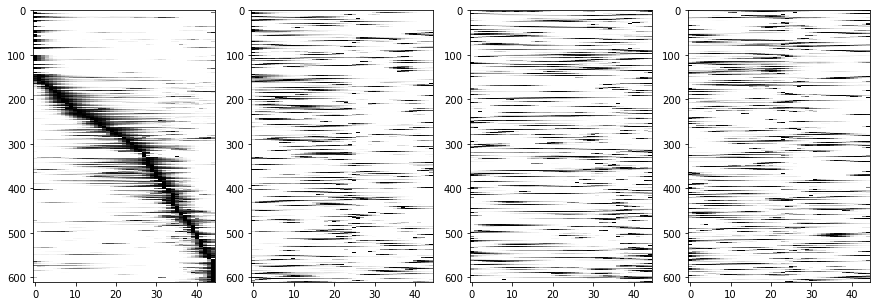

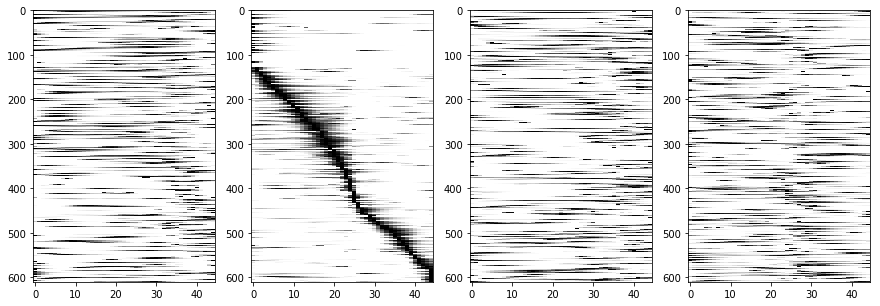

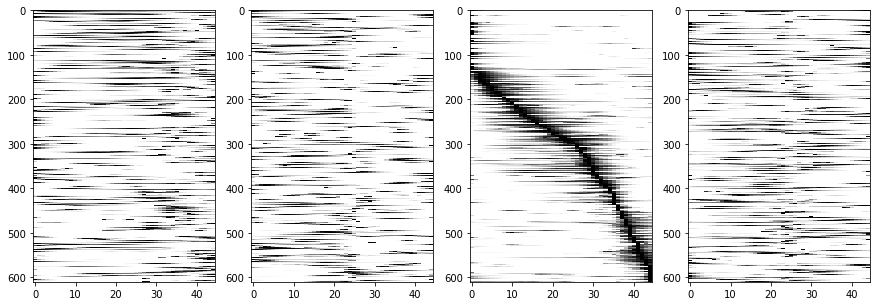

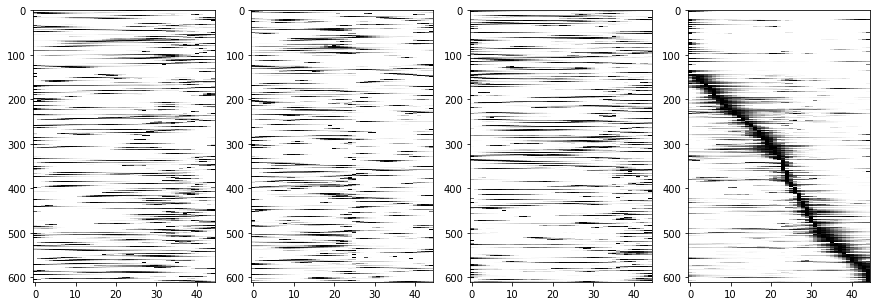

In [67]:
getSort = lambda fr : np.argsort(np.argmax(fr,axis=0))
#factorOrder = [0,1,3,2,4]
for k in range(rank):
    fr_k = np.squeeze(Vmat[k,:,:])
    for col in range(fr_k.shape[1]):
        fr_k[:,col]/=fr_k[:,col].max()
    f,ax = plt.subplots(1,rank,figsize=[15,5])
    sort = getSort(fr_k)
    for j in range(rank):
        fr_j = np.squeeze(Vmat[j,:,:])
        for col in range(fr_j.shape[1]):
            fr_j[:,col]/=fr_j[:,col].max()
            
        ax[j].imshow(fr_j[:,sort].T,cmap='Greys',aspect='auto')
#     fr_ks = fr_k[:,getSort(fr_k)]
#     ax.imshow(fr_ks.T,cmap='Greys',aspect='auto')